<a href="https://colab.research.google.com/github/takahiromiura/class-data-analysis-II-2024/blob/main/notebooks/%E3%82%B0%E3%83%A9%E3%83%95.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# グラフ作成

ここでは、データからグラフを作成する方法を学んでいきます。

まず、`pandas` を使った基本的なグラフの作成を学びます。

その後、`plotnine` というライブラリを使って、より柔軟な設定ができるグラフを作成していきます。

In [1]:
import pandas as pd
from pandas import DataFrame, Series
import plotnine as pn

## なぜグラフを作るのか

そもそも、なぜグラフを作る必要があるのでしょうか。
例えば、以下は[`e-stat`](https://www.e-stat.go.jp/stat-search/files?page=1&layout=datalist&toukei=00400001&tstat=000001011528&cycle=0&tclass1=000001021812&tclass2val=0) から取得した、2014 年から 2023 年度の大学生の数の遷移を示したものです。

In [2]:
num_university_students = DataFrame(
    [
        [2014, 2855529],
        [2015, 2860210],
        [2016, 2873624],
        [2017, 2890880],
        [2018, 2909159],
        [2019, 2918668],
        [2020, 2915605],
        [2021, 2917998],
        [2022, 2930780],
        [2023, 2945599],
    ],
    columns = ["year", "counts"]
)
num_university_students

,year,counts
0,2014,2855529
1,2015,2860210
2,2016,2873624
3,2017,2890880
4,2018,2909159
5,2019,2918668
6,2020,2915605
7,2021,2917998
8,2022,2930780
9,2023,2945599


このデータから大学生の数はどのような変遷を辿っているか読み取ってください。
- 数は増えていますか。
- そのスピードはどのくらいですか。
  
このくらいのデータ数であれば、少し時間があれば読み解けるかと思います。

さて、このデータを以下のようなグラフにしたらどうでしょうか。

<Axes: xlabel='year'>

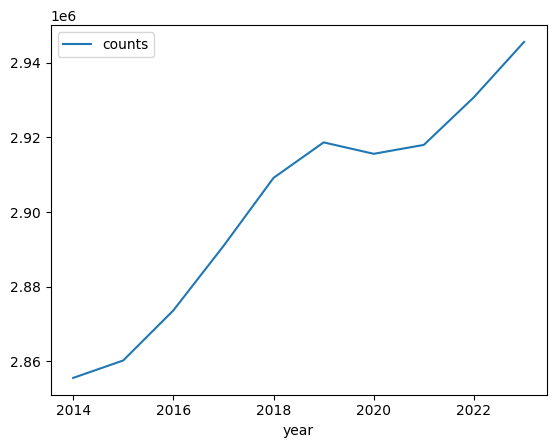

In [3]:
num_university_students.plot(x="year", y="counts", kind="line")

データの数値を見るよりも、すぐに次のことが分かったと思います。

- 大学生の数はほぼ毎年増加している
- 2019 ~ 2021 年はトレンドが停滞している
- 2022 年からは前と同じぐらい増加している

これがグラフの力です。
つまり、グラフはデータに隠れているパターンを視覚的に表現するためのツールです。


## どのような時にグラフを使うのか

グラフを使う目的としては、主に 2 つ挙げられます。
1 つ目は、データを理解するためです。

先ほどの例に出したグラフも、時間経過に伴う変化を視覚的に表現しています。

グラフや記述統計などを行い、データの特性を明らかにすることを **探索的データ分析** (Explanatory Data Aanalysis: EDA) といいます。
分析の前準備や仮説を見つけるために使います。

2 つ目は、ストーリーを語るためです。
例えば、ある年から景気が悪くなったとか、A という方法が他の方法よりも優れているといったものです。
こうしたグラフは、論文やプレゼンなどで使われ、著者が伝えたいメッセージを補強するために使われます。

どのような目的でグラフを作成するのかを念頭に置くことは非常に重要です。
データを理解するためのグラフに不必要なメッセージは、読者 (グラフを読み取る人) がデータの全体像を理解するのを阻害します。
同時に、そのようなメッセージの押し付けは、著者に対する不信感につながります。
一方で、解釈が必要なグラフをただ示すだけだと、読者に解釈を任せるという、認知的な負荷を課してしまいます。

## Pandas を使ったグラフ作成

`Series`, `DataFrame` の `plot` メソッドを使って、簡単なグラフを作成することができます。
`plot` メソッドの `kind` 引数にグラフの種類を指定します。

例えば、以下のグラフを作成できます。

- 折れ線グラフ
- 棒グラフ
- 散布図
- ヒストグラム
- 箱ひげ図
  
その他のグラフについては、[ドキュメント](https://pandas.pydata.org/docs/user_guide/visualization.html)を参照してください。

In [4]:
sales_data = DataFrame({
    "Month": [1, 2, 3, 4, 5, 6],
    "Sales": [250, 270, 300, 280, 320, 310],
    "Profit": [70, 80, 90, 85, 100, 95],
})

### 折れ線グラフ (Line Plot)

横軸が年、縦軸が GDP や人数など、トレンドの変化を見るのに使います。

<Axes: xlabel='Month'>

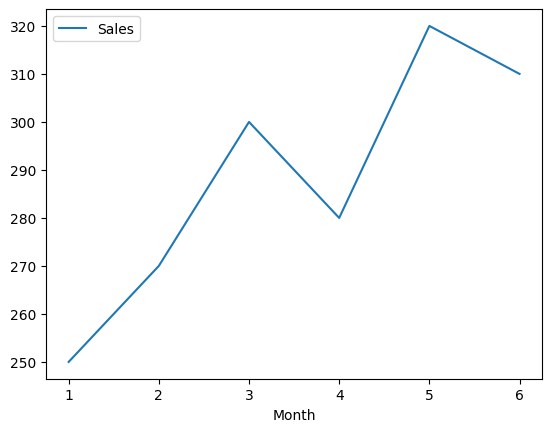

In [5]:
sales_data.plot(x = "Month", y = "Sales", kind = "line")

`x` が横軸、`y` が縦軸です。

また、`plot` アクセッサーを使って、グラフ専用のメソッドも使用することもできます。
折れ線グラフは `line` メソッドです。

<Axes: xlabel='Month'>

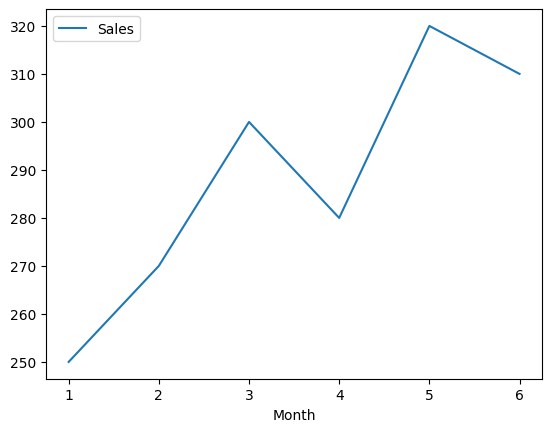

In [6]:
sales_data.plot.line(x="Month", y="Sales")

これは、`plot` メソッドを使って、`kind = "bar"` とやることと同じです。

### 棒グラフ (Bar Plot)

カテゴリー間の合計値や平均値の比較などをするときに使います。

In [7]:
test_data = DataFrame(
    {
        "Student": ["Alice", "Bob", "Charlie", "David", "Eve", "Frank"],
        "Math": [85, 90, 78, 92, 88, 76],
        "Science": [89, 85, 82, 95, 91, 80],
        "English": [76, 88, 85, 90, 84, 78],
    }
)

<Axes: xlabel='Student'>

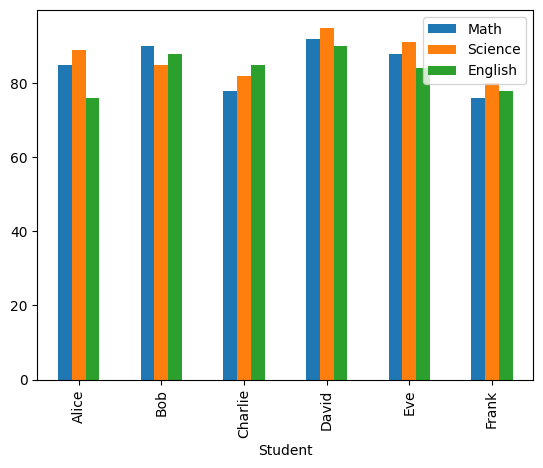

In [8]:
test_data.plot(x = "Student", kind="bar")

`y` を指定して、特定のカラムだけを比較対象にすることも可能です。

<Axes: xlabel='Student'>

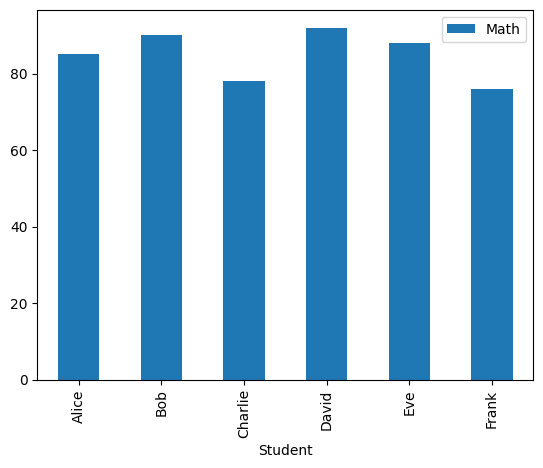

In [9]:
test_data.plot(x="Student", y = "Math", kind="bar")

### 散布図 (Scatter Plot)

2 つのデータの関係を見るのに使います。

In [10]:
study_data = DataFrame({
    "study_hours": [2, 4, 6, 1, 8, 5, 7, 3, 9, 10],
    "test_score": [20, 30, 54, 23, 61, 37, 71, 31, 67, 85],
})

<Axes: xlabel='study_hours', ylabel='test_score'>

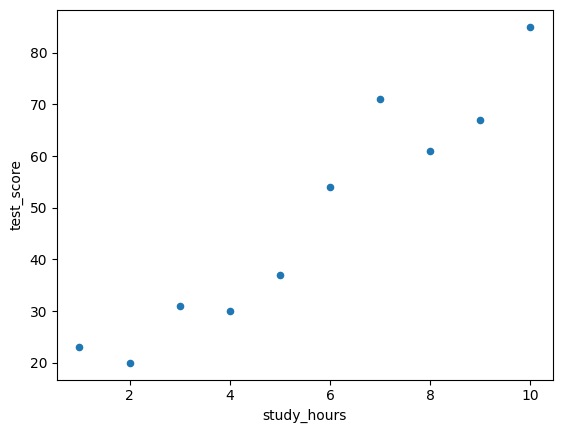

In [11]:
study_data.plot(
    x = "study_hours",
    y = "test_score",
    kind = "scatter",
)

## ヒストグラム

データ全体の分布を見るのに使います。

<Axes: ylabel='Frequency'>

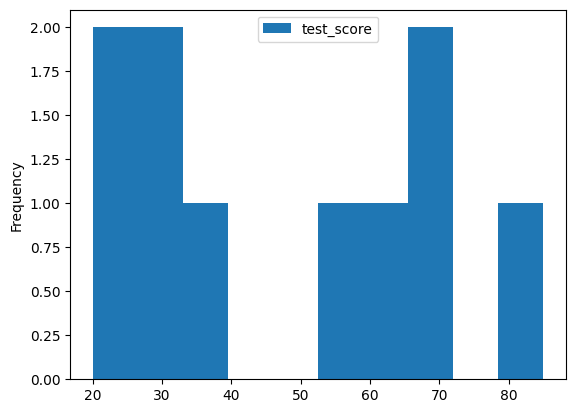

In [12]:
study_data.plot(
    y = "test_score",
    kind = "hist",
)

## 箱ひげ図 (Box Plot)

ヒストグラムとは別の、データの分布を視覚化するための方法です。
箱の上部が上位 25% の値、中央の線が中央値 (50% の値)、下部が 75% の値を示しています。
また、上下に伸びているひげ (ウィスカー) は箱の大きさの 1.5 倍の範囲における最大値と最小値を示しています。
それ以外の範囲の値は外れ値として表示されます。

<Axes: >

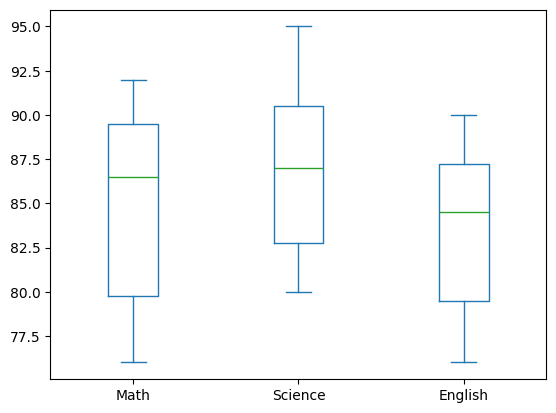

In [13]:
test_data[["Math", "Science", "English"]].plot(
    kind="box"
)

## グラフの調整

単にグラフを作成しただけでは、意味が読み取れないことがあります。
よくあるのは、縦軸・横軸のラベルが略語だったり (ABC, XYZ)、なかったりします。
何に対するデータのグラフなのか、グラフだけで読み取れるようになるのがベストです。

`plot` メソッドおよび `plot` アクセッサーに用意されているグラフメソッドには、グラフにタイトル (`title`) や横軸、縦軸のラベル (`xlabel`, `ylabel`) を付けられます。

In [14]:
sales_data

,Month,Sales,Profit
0,1,250,70
1,2,270,80
2,3,300,90
3,4,280,85
4,5,320,100
5,6,310,95


<Axes: xlabel='Month'>

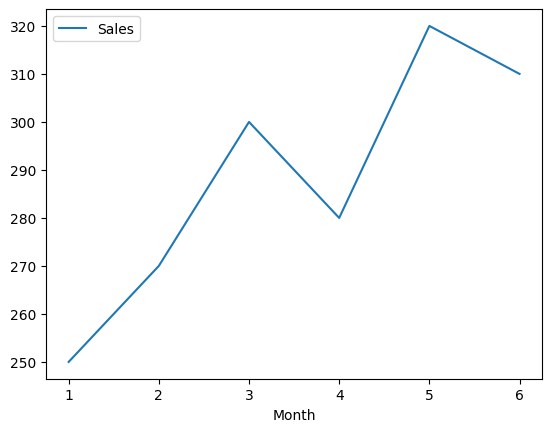

In [15]:
sales_data.plot.line(
    x="Month",
    y="Sales",
) # 何も指定しない場合

<Axes: title={'center': 'Monthly Sales'}, xlabel='Month', ylabel='Amount'>

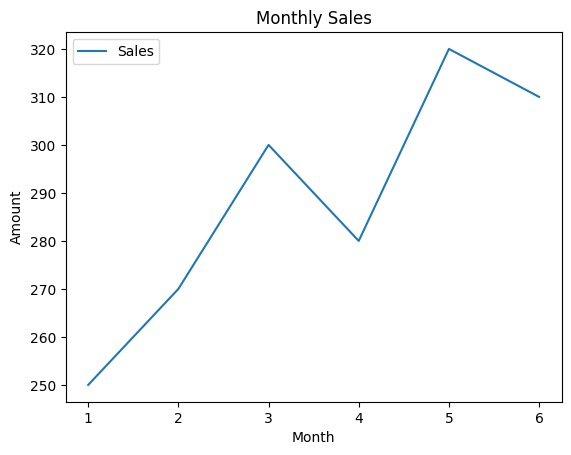

In [16]:
sales_data.plot(
    x="Month",
    y="Sales",
    kind="line",
    title="Monthly Sales",
    ylabel="Amount",
)

画面内の凡例 (legend) も削除できます。

<Axes: title={'center': 'Monthly Sales'}, xlabel='Month', ylabel='Amount'>

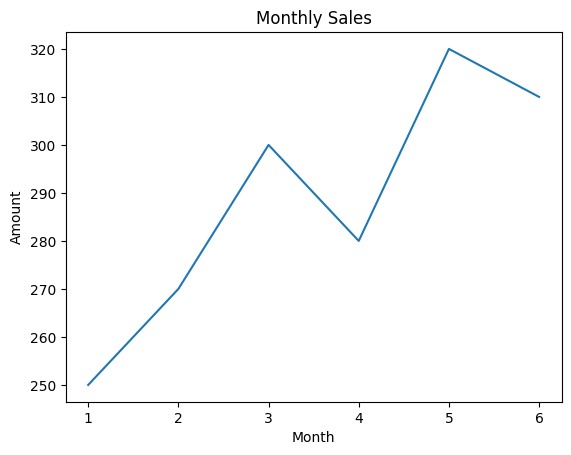

In [17]:
sales_data.plot.line(
    x="Month",
    y="Sales",
    title="Monthly Sales",
    ylabel="Amount",
    legend=False, # 凡例を表示しない
)

複数のカラムを指定して、同じグラフに表示することもできます。
ただし、値がとりうる範囲が異なりすぎると変なグラフになるので注意してください。

<Axes: title={'center': 'Monthly Sales and Profit'}, xlabel='Month', ylabel='Amount'>

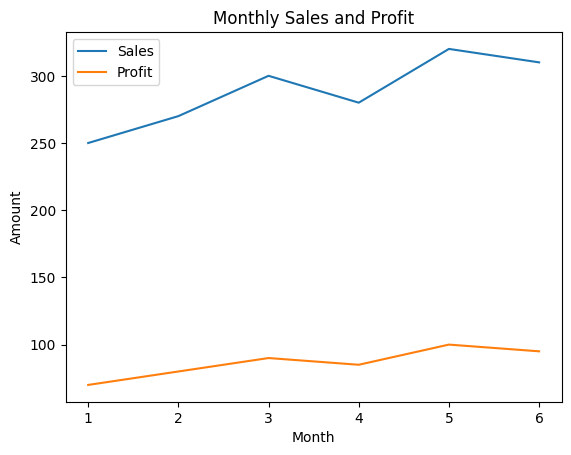

In [18]:
sales_data.plot.line(
    x="Month",
    y=["Sales", "Profit"],
    title="Monthly Sales and Profit",
    ylabel="Amount",
)

`subplots = True` にすると、変数ごとにグラフを作成できます。

array([<Axes: xlabel='Month', ylabel='Amount'>,
       <Axes: xlabel='Month', ylabel='Amount'>], dtype=object)

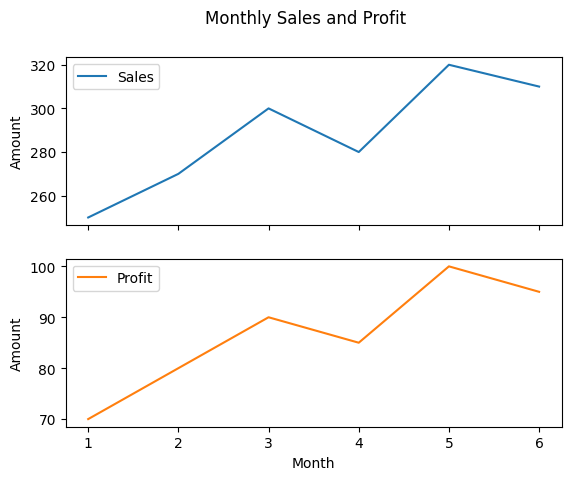

In [19]:
sales_data.plot.line(
    x="Month",
    y=["Sales", "Profit"],
    title="Monthly Sales and Profit",
    ylabel="Amount",
    subplots=True,
)

`linestyle` で点線 (`dotted`) や破線 (`dashed`) にできます。

array([<Axes: xlabel='Month', ylabel='Amount'>], dtype=object)

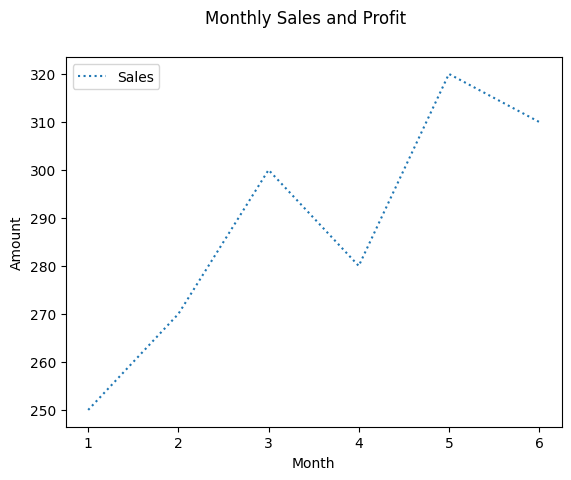

In [20]:
sales_data.plot.line(
    x="Month",
    y="Sales",
    title="Monthly Sales and Profit",
    ylabel="Amount",
    subplots=True,
    linestyle = "dotted"
)

### 日本語の対応

デフォルトでは日本語をグラフに表示できません。
デフォルトのフォントは DejaVu Sans です (参考ページ: https://matplotlib.org/stable/users/explain/text/fonts.html)。
フォントが日本語に対応していないため、いわゆる豆腐文字 ▯ (英語でも tofu と呼ばれるようです) に置き換わってしまいます。

array([<Axes: xlabel='Month', ylabel='売り上げ数'>], dtype=object)

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12426 (\N{HIRAGANA LETTER RI}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 19978 (\N{CJK UNIFIED IDEOGRAPH-4E0A}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 12370 (\N{HIRAGANA LETTER GE}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 22770 (\N{CJK UNIFIED IDEOGRAPH-58F2}) missing from font(s) DejaVu Sans.
/usr/local/lib/python3.11/dist-packages/IPython/core/pyla

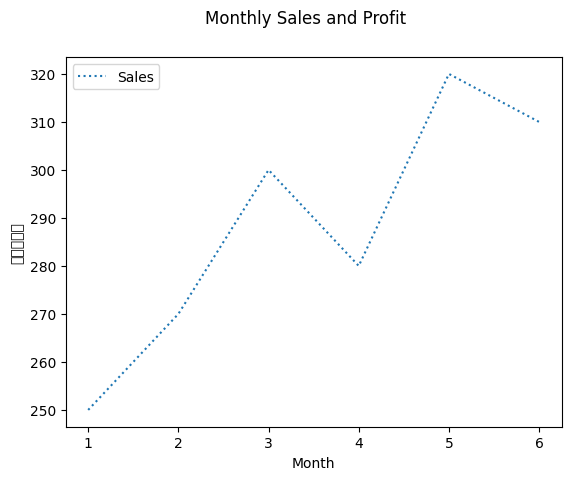

In [21]:
sales_data.plot.line(
    x="Month",
    y="Sales",
    title="Monthly Sales and Profit",
    ylabel="売り上げ数", # 文字化けする
    subplots=True,
    linestyle="dotted",
)

### matplotlib_fontja

Google Colab には日本語に対応しているフォントが入っていません。
なので、まずはフォントをインストールしてから、使用するフォントを指定する必要があります。
設定が面倒なので、`matplotlib-fontja` というライブラリを使います。

このライブラリは Google Colab に入っていないので、まずインストールします。
インストールには、`pip` を使います。
Google Colab の場合、python 以外のコマンドを使うには、`!` を先頭に付けます。

インストールには、`!pip install <library>` とします。

In [22]:
!pip install matplotlib-fontja

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 27.8 MB/s eta 0:00:00


説明の順番上、ここで外部ライブラリをインストールおよび読み込みをしていますが、普段コードを書くときは最初に外部ライブラリのインストール、次に必要なライブラリのインポートを行ってください。

`matplotlib-fontja` は `matplotlib_fontja` という名前で読み込みます。

ちなみに、matplotlib というのは、ほとんどの python のグラフ描画で使われる、ライブラリの名前です。
柔軟な指示をできる一方、非常に複雑なため、簡単に使えるライブラリ (`seaborn` など) が開発されています。

個人的には、`plotline` という、R の `ggplot2` に似たライブラリが利便性と柔軟性のバランスがいいと思います。

In [23]:
import matplotlib_fontja

`matplotlib_fontja` を読み込むと、内部で日本語用のフォント (`IPAexGothic`) に切り替わります。

array([<Axes: xlabel='Month', ylabel='売り上げ数'>], dtype=object)

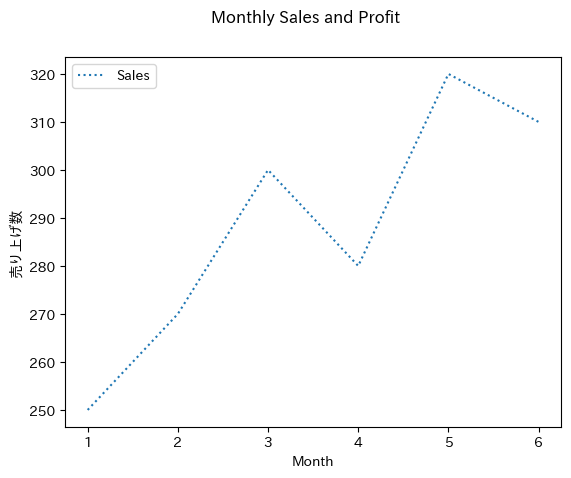

In [24]:
sales_data.plot.line(
    x="Month",
    y="Sales",
    title="Monthly Sales and Profit",
    ylabel="売り上げ数",  # 文字化けしない
    subplots=True,
    linestyle="dotted",
)